# Exercise 2: Inflow-driven model

In this exercise, we want to write a function that reads a vector of time (list of years) and an inflow vector and calculate the outflows and stock.
We assume a fixed lifetime of 4 years.

## Modeling

We start by importing the pandas package:

In [1]:
import pandas as pd

We then import the time and inflow data.

In [2]:
# Extracting data from the source file into a panda Dataframe
file = "/mnt/data/Exercise_2_Data.csv"
# This file is fetched from the shared directory (on the JupyterHub server)

# We read the data and store it in a Dataframe called "data", using the read_csv function from the pandas package
data = pd.read_csv(file,header=0 , sep=',')

# This is just to replace all the void values in "data" by 0, which makes things easier
data.fillna(0, inplace=True)

# We keep only the historic data up to 2008, where there is inflow data
data = data[data.Time < 2009]

# We store the time and inflows values in two lists
time = data['Time'].tolist()
inflows = data['Inflow'].tolist()

In [3]:
historic_data = data[data.Time < 2009]
future_data = data[data.Time >= 2009]

In [4]:
# We check the time data
print(time)

[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]


Write a function that takes the inflows (a list) and lifetime (an integer) as argument and returns a list of outflows

In [5]:
def outflows_inflow_driven (inflows:list, lifetime:int):
    # we use this syntax to indicate that the arguments of the functions have to be a list and an integer
    outflows = []
    for i, inflow in enumerate(inflows):
        if i > lifetime:
            outflows.append(inflows[i-lifetime])
        else:
            outflows.append(0)
    return outflows

Test the function:

In [6]:
lifetime = 4
outflows  = outflows_inflow_driven (inflows=inflows, lifetime=lifetime)
print(outflows)

[0, 0, 0, 0, 0, 3085.651022, 1314.644583, 4843.545514, 3575.745174, 2610.5423969999997, 6049.388165, 3197.065801, 5753.977063, 6526.578667, 719.2723009, 3132.875888, 3674.182644, 3544.525976, 6042.928801, 9367.235464, 6212.29886, 4266.59473, 4419.973554, 4863.323093999999, 10789.10402, 12197.10599, 20288.0069, 23373.990319999997, 27567.94971, 34790.1283, 34766.9415, 28423.88177, 38188.441719999995, 44003.48269, 61008.02176, 62951.928120000004, 45471.83911, 46989.5658, 97929.70245, 246926.4207, 189560.0339, 169567.0292, 213787.8421, 189120.2529, 190843.2527, 269124.6856, 454130.659, 650893.6825, 699527.9112, 754783.1479, 787853.6607, 1046749.3420000001, 845216.7179, 997514.9398, 1304599.044, 1602565.015, 2320646.128, 3043941.7989999996, 2901349.637]


Write a function that calculate the stock change from inflows and outflows:

In [7]:
def stock_change_inflow_driven (inflows:list, outflows:list):
    stock_change = []
    for i in range(len(inflows)):
        stock_change.append(inflows[i]-outflows[i])
    return stock_change

In [8]:
# We can also do it more efficienty using a list comprehension, using the zip function
def stock_change_inflow_driven (inflows:list, outflows:list):
    return [inflow - outflow for inflow, outflow in zip(inflows, outflows)]

In [9]:
# We can also use the  subtract function from the numpy package
import numpy as np
def stock_change_inflow_driven (inflows:list, outflows:list):
    return np.subtract(inflows, outflows)

Test the function:

In [10]:
stock_change = stock_change_inflow_driven (inflows=inflows, outflows=outflows)
print(stock_change)

[  1.15786405e+03   3.08565102e+03   1.31464458e+03   4.84354551e+03
   3.57574517e+03  -4.75108625e+02   4.73474358e+03  -1.64647971e+03
   2.17823189e+03   3.91603627e+03  -5.33011586e+03  -6.41899130e+01
  -2.07979442e+03  -2.98205269e+03   5.32365650e+03   6.23435958e+03
   2.53811622e+03   7.22068754e+02  -1.62295525e+03  -4.50391237e+03
   4.57680516e+03   7.93051126e+03   1.58680333e+04   1.85106672e+04
   1.67788457e+04   2.25930223e+04   1.44789346e+04   5.04989145e+03
   1.06204920e+04   9.21335439e+03   2.62410803e+04   3.45280464e+04
   7.28339739e+03   2.98608311e+03   3.69216807e+04   1.83974493e+05
   1.44088195e+05   1.22577463e+05   1.15858140e+05  -5.78061678e+04
   1.28321880e+03   9.95576564e+04   2.40342817e+05   4.61773430e+05
   5.08684658e+05   4.85658462e+05   3.33723002e+05   3.95855660e+05
   1.45688807e+05   2.42731792e+05   5.16745383e+05   5.55815673e+05
   1.47542941e+06   2.04642686e+06   1.59675059e+06   2.75265717e+06
   3.01008772e+06   3.26193767e+06

Write a function that computes the stock from the stock change:

In [11]:
def stock_inflow_driven (stock_change:list):
    # We need to define the initial stock:
    stock = [0]
    # And then we calculate the stock iteratively 
    # using the previous values of the stock and the stock change
    for i in range(len(stock_change)):
        stock.append(stock[i-1] + stock_change[i-1])
    return stock

Test the function:

In [12]:
stock = stock_inflow_driven (stock_change=stock_change)
print(stock)

[0, 4166171.0, 1157.864047, 4169256.6510219998, 2472.5086300000003, 4174100.1965359999, 6048.2538039999999, 4173625.087911, 10782.997385999999, 4171978.6081980001, 12961.229275, 4175894.6444680002, 7631.1134108999995, 4175830.4545550002, 5551.3189918999997, 4172848.4018640001, 10874.975492, 4179082.76144, 13413.091708, 4179804.8301940002, 11790.136461, 4175300.9178240001, 16366.941621000002, 4183231.4290840002, 32234.974967000002, 4201742.0963099999, 49013.820657000004, 4224335.1186199998, 63492.755257000004, 4229385.0100699998, 74113.247266999999, 4238598.3644599998, 100354.327527, 4273126.4108100003, 107637.72491700001, 4276112.4939200003, 144559.40560699999, 4460086.9865000006, 288647.60039699997, 4582664.4499000004, 404505.740047, 4524858.2821000004, 405788.95884700003, 4624415.9385000002, 646131.77574700001, 5086189.3681000005, 1154816.4342469999, 5571847.8304000003, 1488539.435947, 5967703.4899000004, 1634228.2426470001, 6210435.2818, 2150973.625947, 6766250.9547999995, 3626403.0

In [13]:
outflows = outflows_inflow_driven(inflows=inflows, lifetime=lifetime)
stock_change = stock_change_inflow_driven(inflows=inflows, outflows=outflows)
stock = stock_inflow_driven(stock_change=stock_change)

## Plot the results

To plot the results, we are going to use the module pyplot from the package matplotlib. It is similar to the way MATLAB generates plots.

You can check the official tutorial here: https://matplotlib.org/users/pyplot_tutorial.html

In [14]:
import matplotlib.pyplot as plt

<Figure size 936x720 with 0 Axes>

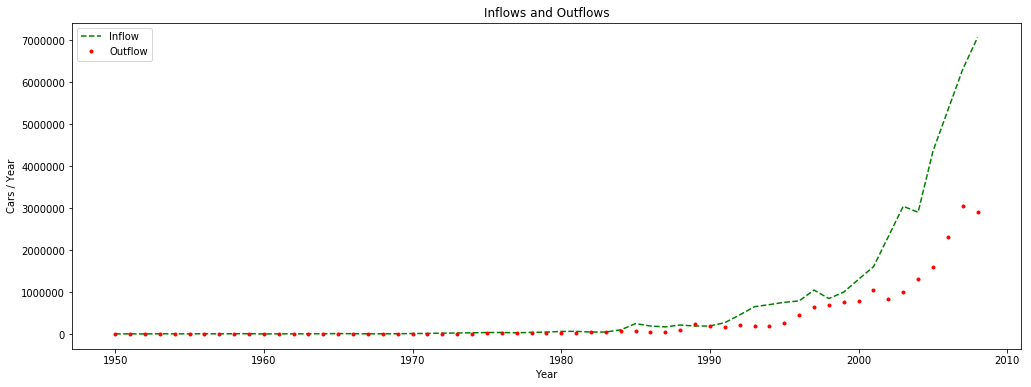

In [15]:
# Plot the results
fig = plt.figure(figsize=(13, 10))

# Inflows and Outflows
plt.figure(figsize=(17, 6))
plt.plot(time, inflows, 'g--', label='Inflow')
plt.plot(time, outflows,'r.', label='Outflow')
plt.title('Inflows and Outflows')
plt.xlabel('Year')
plt.ylabel('Cars / Year')
plt.legend(loc='best')


## Normally distributed lifetime 

If we want to use a normally distributed lifetime instead, we can use the predefined function in the package scipy:

In [16]:
from scipy.stats import norm

We can then use this syntax to calculate the cumulative distribution function of the normal distribution at point x:

norm(lifetime, st_dev).cdf(x).

Here are some examples for a lifetime of 15 years and a standard deviation of 5 years.

In [17]:
from scipy.stats import norm
import numpy as np
s=0
# 3 st_dev below mean
print('3 st_dev below mean:', norm(15, 5).cdf(0))

# 1 st_dev below mean
print('1 st_dev below mean:', norm(15, 5).cdf(10))

# at mean
print('at mean:', norm(15, 5).cdf(15))

# 3 st_dev above mean
print('3 st_dev above mean:', norm(15, 5).cdf(30))

3 st_dev below mean: 0.00134989803163
1 st_dev below mean: 0.158655253931
at mean: 0.5
3 st_dev above mean: 0.998650101968


We can plot the cumulative distribution function:

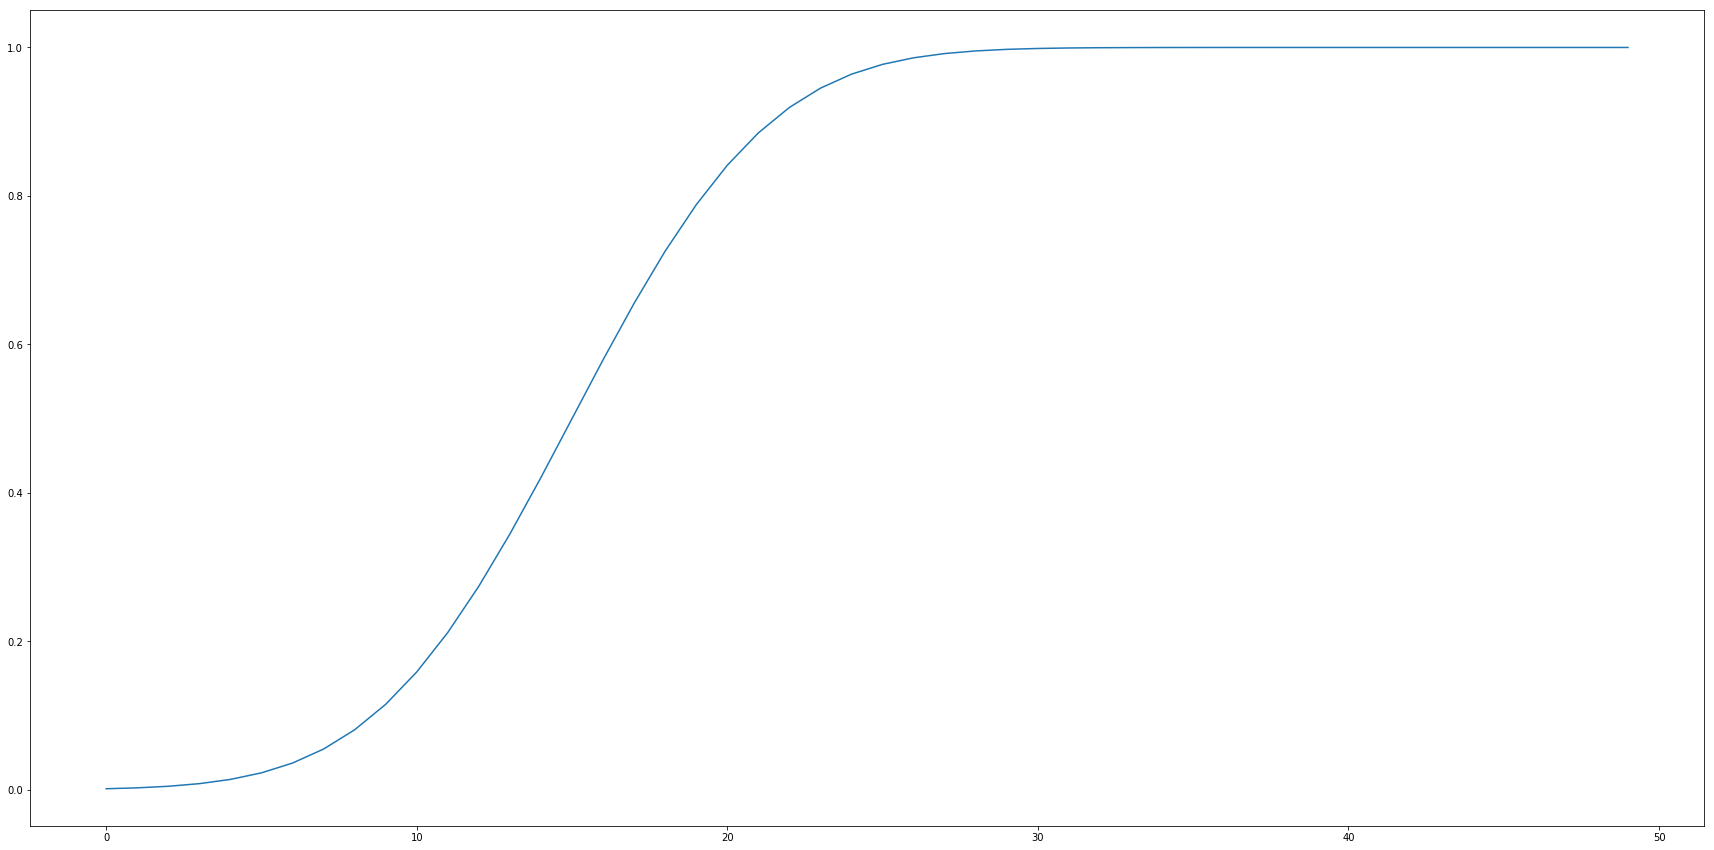

In [18]:
from scipy.stats import norm
import numpy as np
a = [norm(15, 5).cdf(i) for i in range(50)]

fig = plt.figure(figsize=(30, 15))
plt.plot(a)
plt.show()

We can get the probability distribution function by difference:

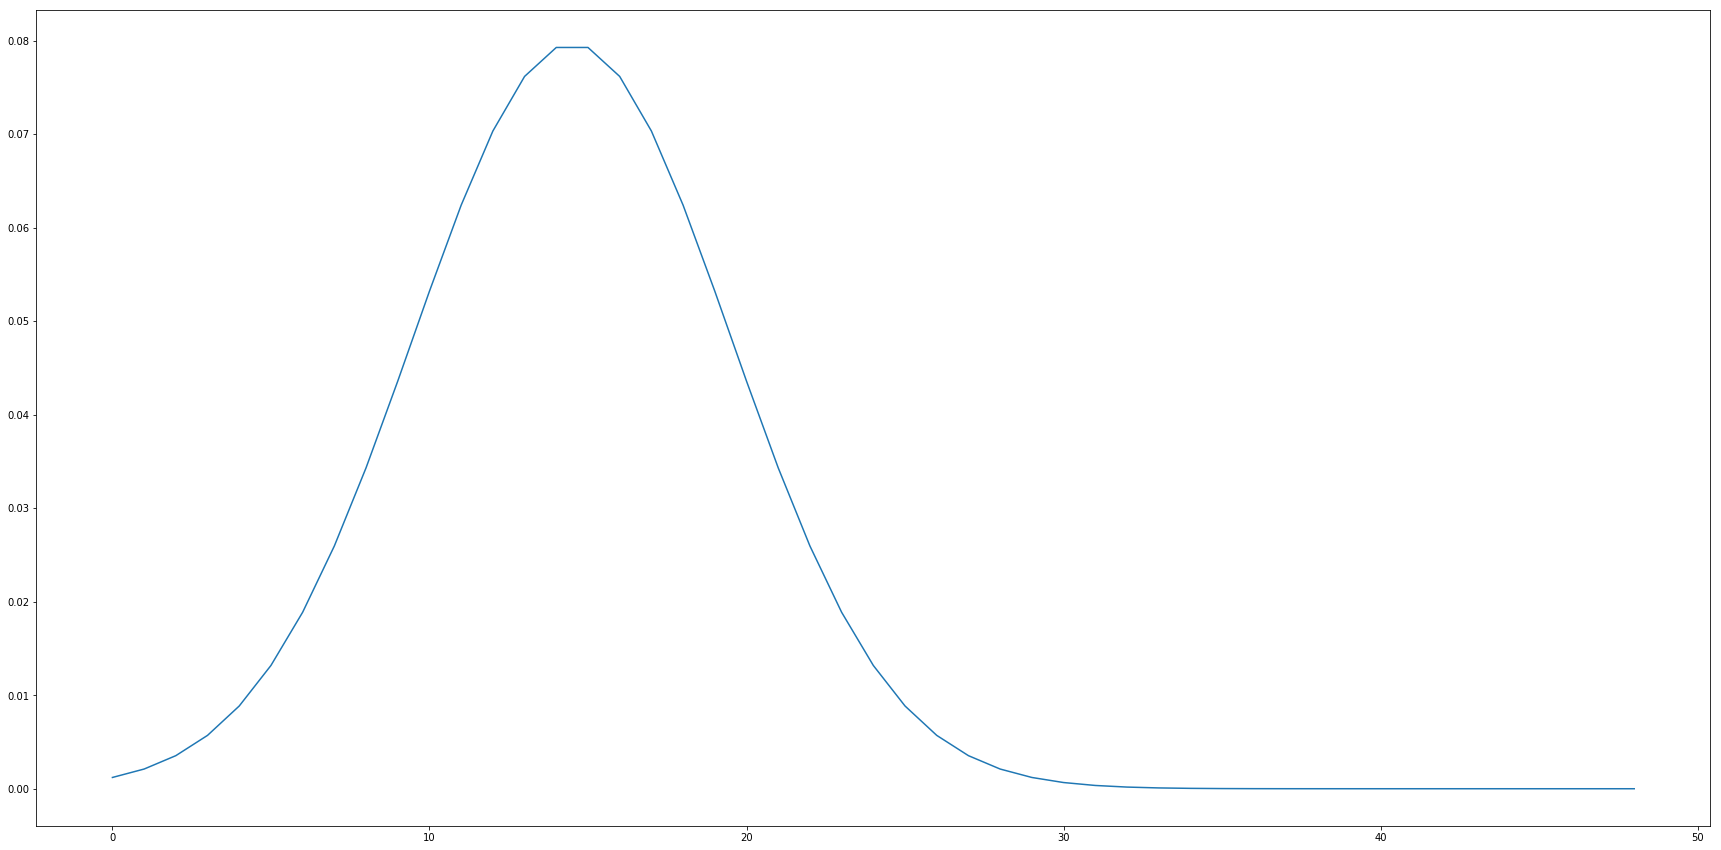

In [19]:
# Probability distribution function
# The function np.diff gives the differencesbetween every (i+1)-th and (i)-th elements of an array 
pdf = np.diff(a)
fig = plt.figure(figsize=(30, 15))
plt.plot(pdf)
plt.show()

In [20]:
sum(pdf)
print(pdf[0])

0.0012052322988


__Remark:__ The sum of all pdf is not equal to one, because we did not take into account the part of the normal distribution when x < 0.

This could be fixed by adding the cdf(0) for the first  year.

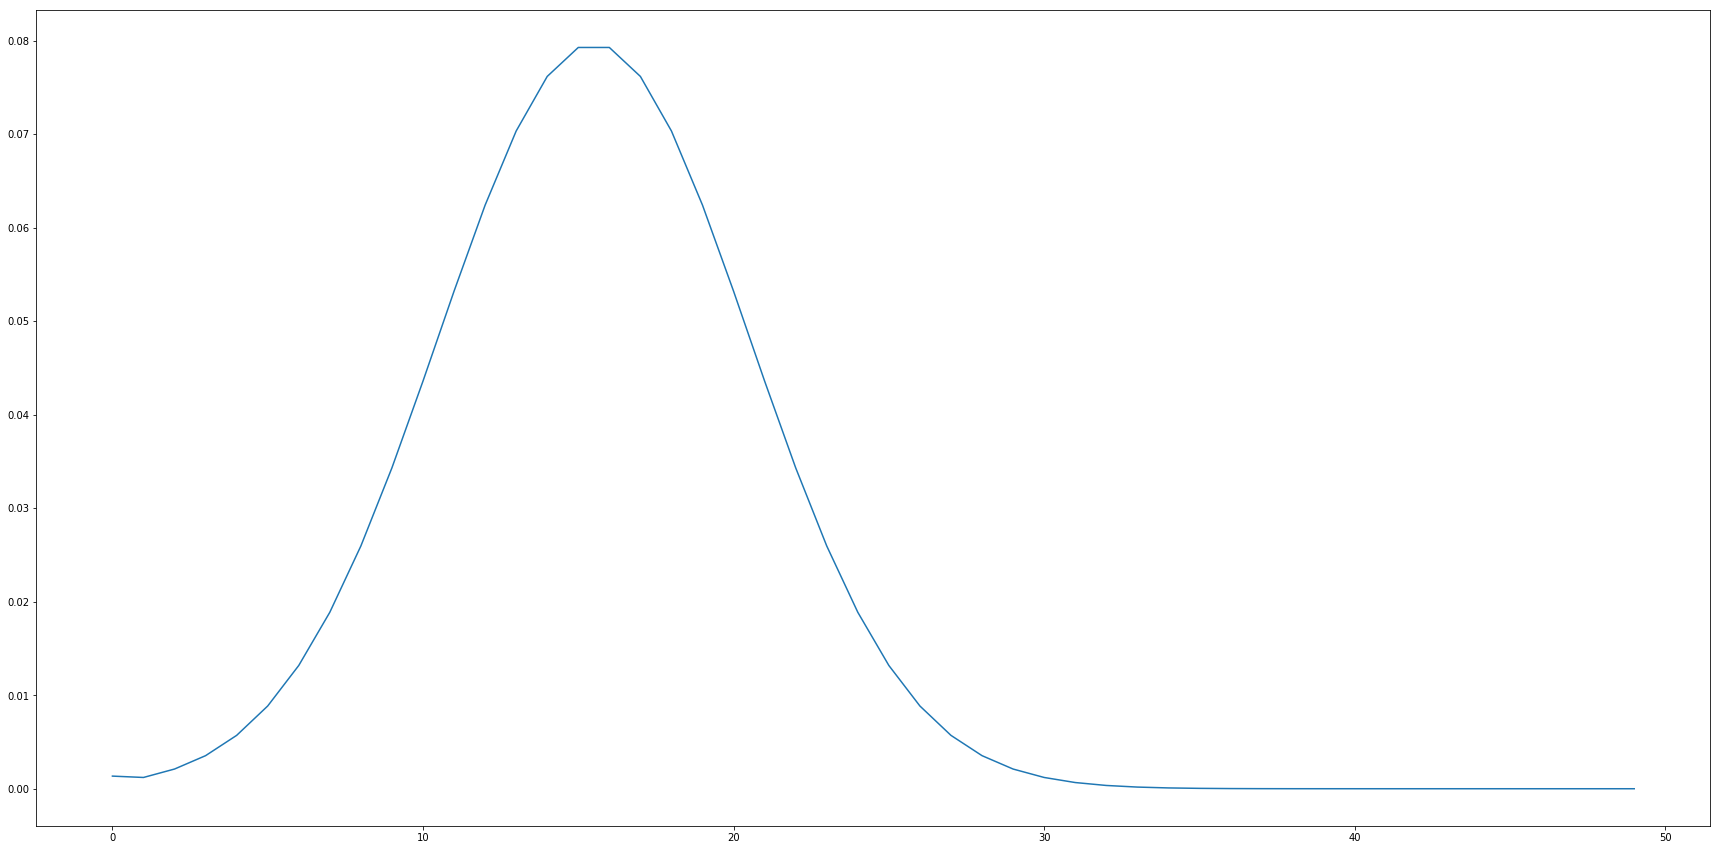

In [21]:
# Probability distribution function
# The function np.diff gives the differencesbetween every (i+1)-th and (i)-th elements of an array 
pdf = np.append(norm(15, 5).cdf(0),  np.diff(a))
fig = plt.figure(figsize=(30, 15))
plt.plot(pdf)
plt.show()

__Question :__
    
Do you think that there should be outflows during the first year of use of a product?

##  Inflow-driven model with a normally distributed lifetime

With a normally distributed lifetime, we need to consider cohorts.

In order to apply the lifetime model one needs to track each cohort in the stock separately. A stock with known subdivision into cohorts can be represented as a time-cohort matrix where each cohort is tracked over time. In the example below, the product lifetime is five years sharp. The time-cohort matrix contains the full information about the stock: the total stock, inflow, and outflow for each year can be derived from it.

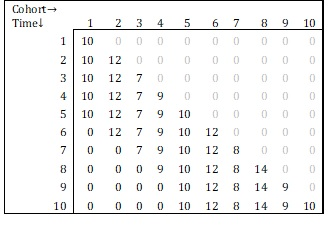

Name the parameters and variables with a subscript, e.g. “_t” or “_tc”, to indicate the dimensions of the matrix. “stock_t” is a vector with the total stock through time and length equal to the number of years (t), while “stock_tc” is a matrix with time (t) as the first dimension and cohort (c) as the second dimension. This makes it easier to keep track of the exact content of a variable and its size.

First, define a function pdf that takes a lifetime, a st_dev and age of cohort as arguments, and returns the probability to exit the stock in this given year:

In [1]:
from scipy.stats import norm
def pdf(lifetime:float, st_dev:float, age:int):
    # Because we want the cumulative sum of the pdf for each year to be equal to 1, we choose to have 
    # outflows during the first year, corresponding to the negative part of the function.
    if age == 0:
        return norm(lifetime, st_dev).cdf(0)
    else:
        return norm(lifetime, st_dev).cdf(age) - norm(lifetime, st_dev).cdf(age - 1)
    
pdf(100,3,95) - norm(100, 3).pdf(95)

-0.00811882593961405

Then, define a function outflows_t_c_inflow_driven which returns a 2D array outflows_tc, given inflows, a lifetime and a standard deviation:

In [2]:
def outflows_tc_inflow_driven(inflows_t:list, lifetime:float, st_dev:float):
    outflows_tc = np.zeros((len(inflows_t),len(inflows_t)))
    for time in range(len(inflows_t)):
        for cohort in range(time+1):
            outflows_tc[time, cohort] = inflows_t[cohort] *  pdf(lifetime, st_dev, time - cohort)
    return outflows_tc

Define a function that calculates the total outflows vector outflows_t from the array outflows_tc:

In [24]:
def outflows_t_from_outflows_tc(outflows_tc:np.array):
    return outflows_tc.sum(axis =1)

Define a function stock_tc_from_outflows_tc that calculates the stock_tc array from the inflows_t vector and the outflows_tc array:

In [25]:
def stock_tc_from_outflows_tc (inflows_t:np.array, outflows_tc:np.array):
    # We start by calculating the stock change_tc:
    stock_change_tc = np.diag(inflows) - outflows_tc
    # We calculate stock_tc from stock_change_tc using the cumsum function:
    stock_tc = np.cumsum(stock_change_tc,axis=0) 
    return stock_tc

Finally, calculate the stock_t and stock_change_t vectors:

In [26]:
# Define lifetime parameters
lifetime = 15
st_dev = 5

# Compute the outflows_tc array
outflows_tc = outflows_tc_inflow_driven(inflows, lifetime, st_dev)

# Calculate outflow_t from outflows_tc:
outflows_t = outflows_t_from_outflows_tc(outflows_tc)

# Calculate stock_tc from outflows_tc:
stock_tc = stock_tc_from_outflows_tc(inflows, outflows_tc)

# Calculate the total stock by summing the rows of stock_t_c
stock_t = stock_tc.sum(axis=1)

# To calculate the stock change, we can reuse the function from the previous exercise
stock_change_t = stock_change_inflow_driven(inflows=inflows, outflows=outflows_t)


<Figure size 936x720 with 0 Axes>

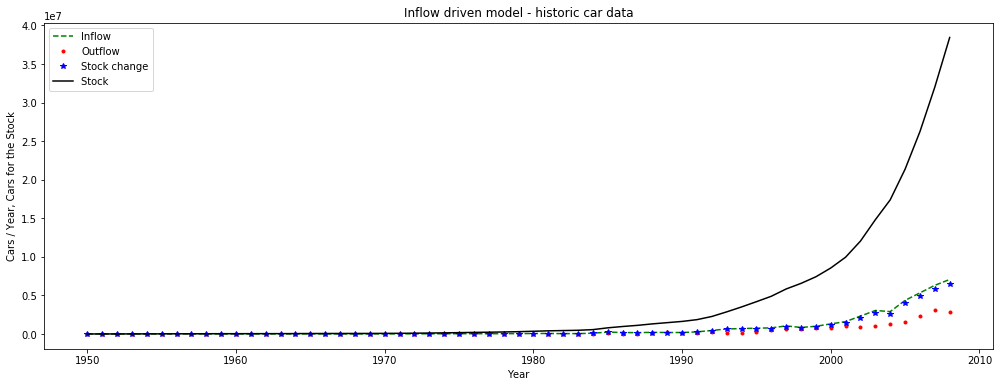

In [27]:
# Plot the results
fig = plt.figure(figsize=(13, 10))

# Inflows and Outflows
plt.figure(figsize=(17, 6))
plt.plot(time, inflows, 'g--', label='Inflow')
plt.plot(time, outflows,'r.', label='Outflow')
plt.plot(data['Time'], stock_change_t, 'b*', label='Stock change')
plt.plot(data['Time'], stock_t, 'k-', label='Stock ')
plt.title('Inflow driven model - historic car data')
         
plt.xlabel('Year')
plt.ylabel('Cars / Year, Cars for the Stock')
plt.legend(loc='best')

In [28]:
# Check mass balance:
inflows - outflows_t == stock_change_t

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True], dtype=bool)

In [29]:
# Check stock calculation:
print(max(stock_change_t[1:] - np.diff(stock_t)))

5.58793544769e-09


In [30]:
# For the first year:
inflows[0] - outflows_t[0] == stock_t[0]    

True